In [1]:
import os
import numpy as np
import glob
import shutil
import math
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
zip_file = tf.keras.utils.get_file(origin=URL,
                                   fname="flower_photos.tgz",
                                   extract=True)
base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

In [3]:
class_names = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']
m_train = 0
m_val = 0
for cl in class_names:
    img_path = os.path.join(base_dir, cl)
    images = glob.glob(img_path + '/*.jpg')
    print("{}: {} Images".format(cl, len(images)))
    train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]
    
    m_train += len(train)
    m_val += len(val)
    print("Added {} to training set and {} to validation set".format(len(train), len(val)))
    
    for t in train:
        if not os.path.exists(os.path.join(base_dir, 'train', cl)):
            os.makedirs(os.path.join(base_dir, 'train', cl))
        shutil.move(t, os.path.join(base_dir, 'train', cl))
    for v in val:
        if not os.path.exists(os.path.join(base_dir, 'val', cl)):
            os.makedirs(os.path.join(base_dir, 'val', cl))
        shutil.move(v, os.path.join(base_dir, 'val', cl))
print(m_train,"images in training set")
print(m_val,"images in validation set")

roses: 641 Images
Added 513 to training set and 128 to validation set
daisy: 633 Images
Added 506 to training set and 127 to validation set
dandelion: 898 Images
Added 718 to training set and 180 to validation set
sunflowers: 699 Images
Added 559 to training set and 140 to validation set
tulips: 799 Images
Added 639 to training set and 160 to validation set
2935 images in training set
735 images in validation set


In [4]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
!ls {base_dir}
!ls {train_dir}
!ls {val_dir}
print(base_dir)

daisy  dandelion  LICENSE.txt  roses  sunflowers  train  tulips  val
daisy  dandelion  roses  sunflowers  tulips
daisy  dandelion  roses  sunflowers  tulips
/home/sean/.keras/datasets/flower_photos


In [5]:
batch_size = 64
IMG_SHAPE = 150

In [6]:
def show_many(imgs, count, rows, cols, size):
    plt.figure(figsize=size)
    for i in range(count):
        plt.subplot(rows, cols, i+1)
        plt.imshow(imgs[i])

In [7]:
image_gen = ImageDataGenerator(rescale=1./255,
                               horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(directory=train_dir,
                                               target_size=(IMG_SHAPE,IMG_SHAPE),
                                               batch_size=batch_size,
                                               shuffle=True)

Found 2935 images belonging to 5 classes.


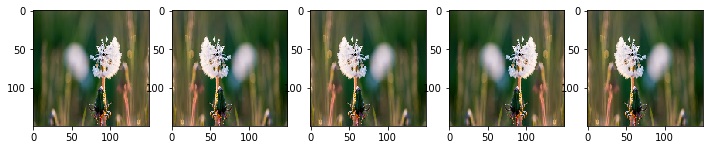

In [8]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
show_many(augmented_images, 5, 1, 5, (12,12))

In [9]:
image_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=45)
train_data_gen = image_gen.flow_from_directory(directory=train_dir,
                                               target_size=(IMG_SHAPE,IMG_SHAPE),
                                               batch_size=batch_size,
                                               shuffle=True)

Found 2935 images belonging to 5 classes.


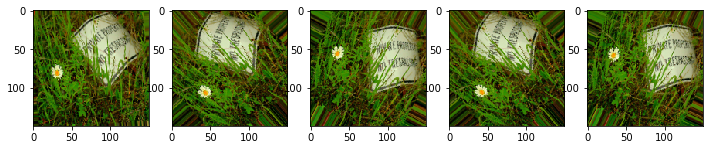

In [10]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
show_many(augmented_images, 5, 1, 5, (12,12))

In [21]:
image_gen = ImageDataGenerator(rescale=1./255,
                               zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(directory=train_dir,
                                               target_size=(IMG_SHAPE,IMG_SHAPE),
                                               batch_size=batch_size,
                                               shuffle=True)

Found 2935 images belonging to 5 classes.


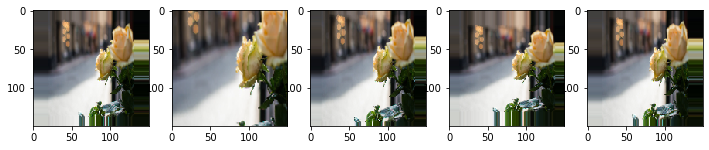

In [22]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
show_many(augmented_images, 5, 1, 5, (12,12))

In [25]:
image_gen.flow_from_directory?
image_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=45,
                               zoom_range=0.5,
                               horizontal_flip=True,
                               width_shift_range=0.15,
                               height_shift_range=0.15,
                               fill_mode='nearest')
train_data_gen = image_gen.flow_from_directory(directory=train_dir,
                                               target_size=(IMG_SHAPE,IMG_SHAPE),
                                               batch_size=batch_size,
                                               shuffle=True,
                                               class_mode='categorical')

Found 2935 images belonging to 5 classes.


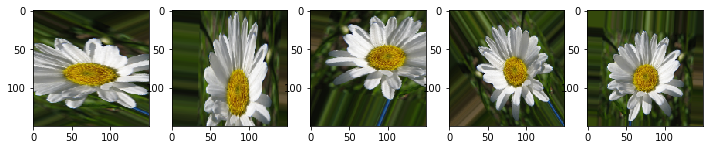

In [26]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
show_many(augmented_images, 5, 1, 5, (12,12))

In [27]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(directory=val_dir,
                                                 target_size=(IMG_SHAPE,IMG_SHAPE),
                                                 batch_size=batch_size,
                                                 shuffle=False)

Found 735 images belonging to 5 classes.


In [16]:
L = [
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
]
model = tf.keras.Sequential(L)

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [31]:
epochs = 30
history = model.fit_generator(
    generator=train_data_gen,
    steps_per_epoch=math.ceil(m_train / batch_size),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=math.ceil(m_val / batch_size)
)

Epoch 1/30
46/46 [==============================] - 47s 1s/step - loss: 1.4768 - accuracy: 0.3615 - val_loss: 1.1802 - val_accuracy: 0.5156
Epoch 2/30
46/46 [==============================] - 44s 955ms/step - loss: 1.1255 - accuracy: 0.5503 - val_loss: 1.1173 - val_accuracy: 0.5782
Epoch 3/30
46/46 [==============================] - 44s 947ms/step - loss: 1.0142 - accuracy: 0.6003 - val_loss: 1.0148 - val_accuracy: 0.6014
Epoch 4/30
46/46 [==============================] - 44s 963ms/step - loss: 0.9751 - accuracy: 0.6259 - val_loss: 0.9593 - val_accuracy: 0.6313
Epoch 5/30
46/46 [==============================] - 44s 958ms/step - loss: 0.9145 - accuracy: 0.6446 - val_loss: 0.8632 - val_accuracy: 0.6735
Epoch 6/30
46/46 [==============================] - 42s 918ms/step - loss: 0.8910 - accuracy: 0.6542 - val_loss: 0.9473 - val_accuracy: 0.6286
Epoch 7/30
46/46 [==============================] - 41s 896ms/step - loss: 0.8618 - accuracy: 0.6627 - val_loss: 0.8594 - val_accuracy: 0.6680
Ep